In [1]:
install.packages("UsingR")
library(UsingR)
install.packages("dplyr")
library(dplyr)
install.packages("Amelia")
library(Amelia)
install.packages("caTools")
library(caTools)
install.packages("rpart")
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘HistData’, ‘Hmisc’


Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘UsingR’


The following object is masked from ‘package:survival’:

    cancer


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package

In [2]:
df<-read.csv("/content/Sales_train.csv")


In [3]:
str(df)

'data.frame':	550068 obs. of  12 variables:
 $ User_ID                   : int  1000001 1000001 1000001 1000001 1000002 1000003 1000004 1000004 1000004 1000005 ...
 $ Product_ID                : chr  "P00069042" "P00248942" "P00087842" "P00085442" ...
 $ Gender                    : chr  "F" "F" "F" "F" ...
 $ Age                       : chr  "0-17" "0-17" "0-17" "0-17" ...
 $ Occupation                : int  10 10 10 10 16 15 7 7 7 20 ...
 $ City_Category             : chr  "A" "A" "A" "A" ...
 $ Stay_In_Current_City_Years: chr  "2" "2" "2" "2" ...
 $ Marital_Status            : int  0 0 0 0 0 0 1 1 1 1 ...
 $ Product_Category_1        : int  3 1 12 12 8 1 1 1 1 8 ...
 $ Product_Category_2        : int  NA 6 NA 14 NA 2 8 15 16 NA ...
 $ Product_Category_3        : int  NA 14 NA NA NA NA 17 NA NA NA ...
 $ Purchase                  : int  8370 15200 1422 1057 7969 15227 19215 15854 15686 7871 ...


In [4]:
df$User_ID <- as.factor(df$User_ID)
df$Product_ID <- as.factor(df$Product_ID)
df$Gender <- as.numeric(ifelse(df$Gender=="M", 1, 0))
df$Product_Category_1 <- as.numeric(df$Product_Category_1)

df$Marital_Status <- as.numeric(df$Marital_Status)
df$City_Category <- as.numeric(ifelse(df$City_Category=='A', 1, ifelse(df$City_Category=='B', 2, 3)))
df$Occupation <- as.numeric(df$Occupation)
df$Stay_In_Current_City_Years = as.numeric(ifelse(df$Stay_In_Current_City_Years=='4+', 6, df$Stay_In_Current_City_Years))
df$Age <- as.numeric(ifelse(df$Age=='0-17', 17, ifelse(df$Age=='18-25', 25, ifelse(df$Age=='26-35', 35, ifelse(df$Age=='36-45', 45, ifelse(df$Age=='46-50', 50, ifelse(df$Age=='51-55', 55, 65)))))))
df$Product_ID <- NULL
df$User_ID <- NULL
df$Product_Category_2 <- NULL
df$Product_Category_3 <- NULL

In [5]:
#Split data
set.seed(101)
sample <- sample.split(df$Purchase, SplitRatio = .7)
train <- subset(df, sample == T)
test <- subset(df, sample == F)

## Linear Regression

In [6]:
model <- lm(Purchase ~., train)
summary(model)


Call:
lm(formula = Purchase ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10063.0  -3128.3   -640.6   2237.8  17549.5 

Coefficients:
                            Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                9915.8779    38.1958  259.606  < 2e-16 ***
Gender                      507.7983    17.7115   28.671  < 2e-16 ***
Age                          14.2168     0.7456   19.069  < 2e-16 ***
Occupation                    6.7011     1.1764    5.696 1.22e-08 ***
City_Category               361.1273    10.0406   35.967  < 2e-16 ***
Stay_In_Current_City_Years    2.2177     4.0523    0.547 0.584190    
Marital_Status              -56.1702    16.1794   -3.472 0.000517 ***
Product_Category_1         -435.1868     1.9293 -225.562  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4703 on 385079 degrees of freedom
Multiple R-squared:  0.1236,	Adjusted R-squared:  0.1236 
F-statistic:  7756

In [7]:
predict <- predict(model, test[,-8])  
results <- cbind(predict, test$Purchase)
colnames(results) <- c('pred','real')
head(results)

,pred,real
5,9070.181,7969
8,11416.758,15854
9,11416.758,15686
10,7880.967,7871
12,7880.967,3957
16,9380.711,2079


In [8]:
results <- as.data.frame(results)
sqrt(mean((results$real - results$pred)^2))

[1] 4694.309

The Linear Regression reports rmse of 4694.309

## Decission Tree

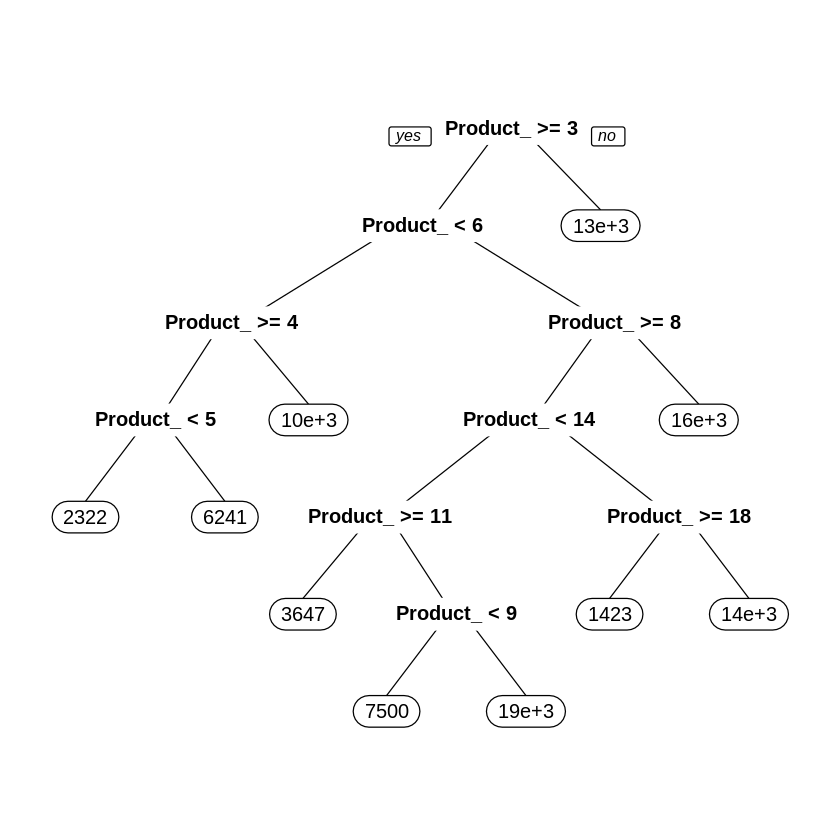

In [9]:
tree <- rpart(Purchase ~., method = 'anova',train)
prp(tree)

In [10]:
predicted <- predict(tree, test[,-8])
predicted <- as.data.frame(predicted)
head(predicted)

,predicted
,<dbl>
5,7500.297
8,13267.886
9,13267.886
10,7500.297
12,7500.297
16,2322.340


In [11]:
result <- cbind(test$Purchase, predicted$predicted)
colnames(result) <- c('real','pred')
result <- as.data.frame(result)
sqrt(mean((result$real - result$pred)^2))

[1] 3099.602